In [1]:
# General Libraries:
import os
from PIL import Image
import numpy as np
from sklearn.utils import shuffle
from collections import Counter

# Libraries for Data Vizualization:
import matplotlib.pyplot as plt

In [2]:
def load_data(directory):
    images = []  # Change 'paths' to 'images'
    labels = []

    for label in os.listdir(directory):
        for image in os.listdir(os.path.join(directory, label)):
            img_path = os.path.join(directory, label, image)

            # Read and resize the image using Pillow
            img = Image.open(img_path)
            img_array = np.array(img)

            # Append the image array and the label to the lists
            images.append(img_array)  # Change 'paths' to 'images'
            labels.append(label)

    # Shuffle the arrays using sklearn.utils.shuffle
    images, labels = shuffle(images, labels, random_state=42)  # Change 'paths' to 'images'

    return images, labels

In [3]:
train_dir = r'C:\Users\andmpereira\OneDrive - Grupo Jerónimo Martins\Documentos\GitHub\DLNN-Group2\00 - Dataset\Training'
test_dir = r'C:\Users\andmpereira\OneDrive - Grupo Jerónimo Martins\Documentos\GitHub\DLNN-Group2\00 - Dataset\Testing'

In [4]:
# Load training data
train_images, train_labels = load_data(train_dir)

# Load testing data
test_images, test_labels = load_data(test_dir)


In [5]:
def plot_images(images, labels, class_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(f"Tumor: {labels[i]}")
        axes[i].axis("off")

    plt.show()

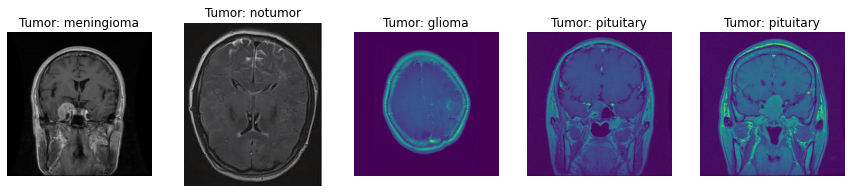

In [6]:
# Assuming you have a list of class names
class_names = {'pituitary', 'notumor', 'meningioma', 'glioma'}

# Load and plot some images from the training set
plot_images(train_images, train_labels, class_names)

In [7]:

# Get the number of images in the train and test sets
num_train_images = len(train_images)
num_test_images = len(test_images)

# Display the results
print("Number of Images in Train Set:", num_train_images)
print("Number of Images in Test Set:", num_test_images)


Number of Images in Train Set: 5712
Number of Images in Test Set: 1311


In [8]:
# Get the number of occurrences of each label in the training and testing sets
train_label_counts = {label: train_labels.count(label) for label in set(train_labels)}
test_label_counts = {label: test_labels.count(label) for label in set(test_labels)}

# Define colors for each label
label_colors = {'pituitary': '#BBDEF0', 'notumor': '#00A6A6', 'meningioma': '#EFCA08', 'glioma': '#F49F0A'}


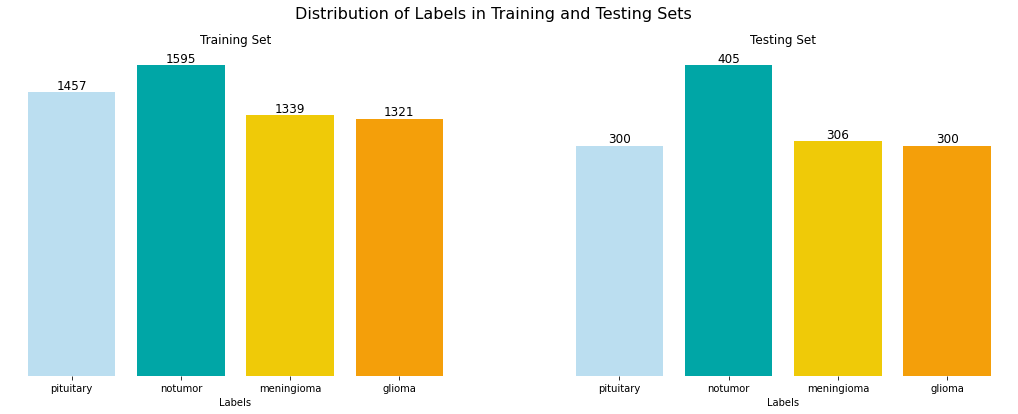

In [9]:
# Plot the side-by-side bar charts for both training and testing sets
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribution of Labels in Training and Testing Sets', fontsize=16)

# Training Set Bar Chart
for label, count in train_label_counts.items():
    axs[0].bar(label, count, color=label_colors[label])
    axs[0].text(label, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

axs[0].set_title('Training Set')
axs[0].set_xlabel('Labels')
axs[0].get_yaxis().set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Testing Set Bar Chart
for label, count in test_label_counts.items():
    axs[1].bar(label, count, color=label_colors[label])
    axs[1].text(label, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

axs[1].set_title('Testing Set')
axs[1].set_xlabel('Labels')
axs[1].get_yaxis().set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['left'].set_visible(False)


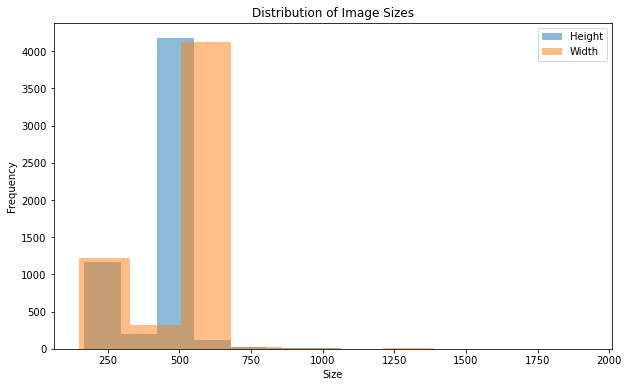

In [11]:
# Calculate image sizes
image_sizes = np.array([img.shape[:2] for img in train_images])

# Visualize image size distribution
plt.figure(figsize=(10, 6))
plt.hist(image_sizes[:, 0], bins=10, alpha=0.5, label='Height')
plt.hist(image_sizes[:, 1], bins=10, alpha=0.5, label='Width')
plt.title('Distribution of Image Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

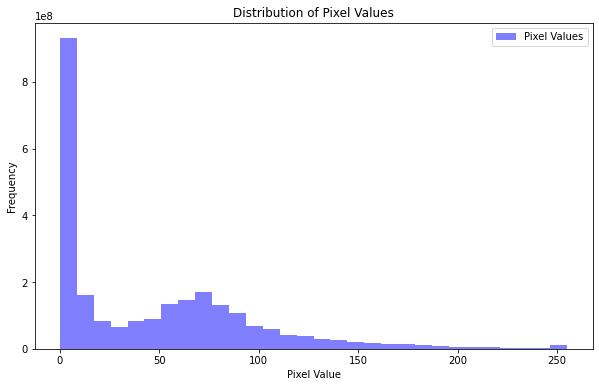

In [12]:
# Calculate pixel value distribution
pixel_values = np.concatenate([img.flatten() for img in train_images])

# Visualize pixel value distribution
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=30, alpha=0.5, color='blue', label='Pixel Values')
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()